<a href="https://colab.research.google.com/github/ykamen/CS4342/blob/main/CS4342_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tr_faces = np.load('drive/MyDrive/age_regression_Xtr.npy', 'r')
tr_ages = np.load('drive/MyDrive/age_regression_ytr.npy', 'r')
te_faces = np.load ('drive/MyDrive/age_regression_Xte.npy', 'r')
te_ages = np.load('drive/MyDrive/age_regression_yte.npy', 'r')

In [ ]:
def reshapeAndAppend1s(faces):
  a = faces.reshape(faces.shape[0],faces.shape[1]*faces.shape[2])
  rowof1s = np.ones((faces.shape[0],1))
  Xtilde = np.hstack((a,rowof1s))
  return Xtilde

def p13(x,k):
  return np.tile(x,(k,1))

def fMSE(wtilde,Xtilde,y):
  temp = Xtilde.T
  wtilde = np.tile(wtilde,(Xtilde.shape[0],1))
  temp = np.multiply(wtilde,Xtilde)
  SEs = []
  for i in range(wtilde.shape[0]):
    a = sum(temp[i])
    b = (y[i] - a)**2
    SEs.append(b)
  halfMSE = np.mean(SEs)/2
  return halfMSE

# Given a vector of weights w, a design matrix Xtilde, and a vector of labels y, and a regularization strength
# alpha (default value of 0), return the gradient of the (regularized) MSE loss.
def gradfMSE (wtilde, Xtilde, y, alpha = 0.1):
  temp = fMSE(wtilde,Xtilde,y)
  a = wtilde.T
  temp2 = alpha/(2*y.shape[0])*wtilde.dot(a)
  fin = temp - temp2
  return fin

def invcalc(A):
  temp = np.eye(A.shape[0])
  inv = np.linalg.solve(A,temp)
  return inv

def method1(Xtilde,y):
  temp = Xtilde.T
  temp2 = invcalc(temp.dot(Xtilde))
  temp3 = temp2.dot(temp)
  fin = temp3.dot(y)
  return fin

def gradientDescent (Xtilde, y, alpha=0):
  w0 = 0.01 * np.random.randn(Xtilde.shape[1])
  EPSILON = 3e-3  # Step size aka learning rate
  T = 5000  # Number of gradient descent iterations
  temp = Xtilde.T
  for i in range(T):
    temp2 = Xtilde.dot(w0) - y
    fin = temp.dot(temp2)/y.shape
    w0 = w0 - EPSILON*(fin+alpha*w0/y.shape)
  return w0

def method2(Xtilde,y):
  fin = gradientDescent(Xtilde,y)
  return fin

def method3(Xtilde,y,alpha):
  fin = gradientDescent(Xtilde,y,alpha)
  return fin

def plotw(w):
  fin = w[:-1]
  return plt.imshow(fin.reshape(48,48))

def trainPolynomialRegressor(set,d):
  pass

In [ ]:
print(reshapeAndAppend1s(tr_faces))

[[0.23921569 0.29019609 0.33725491 ... 0.53333336 0.55686277 1.        ]
 [0.17647059 0.19215687 0.23137255 ... 0.38039216 0.36470589 1.        ]
 [0.33725491 0.34117648 0.33333334 ... 0.3137255  0.46666667 1.        ]
 ...
 [0.73725492 0.75686276 0.78039217 ... 0.13725491 0.16862746 1.        ]
 [0.61176473 0.63921571 0.64705884 ... 0.22745098 0.22352941 1.        ]
 [0.72941178 0.7647059  0.80784315 ... 0.70588237 0.68235296 1.        ]]


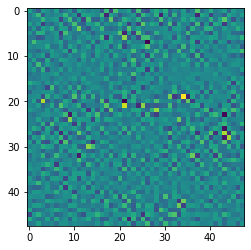

In [ ]:
xtr = reshapeAndAppend1s(tr_faces)
xte = reshapeAndAppend1s(te_faces)
plotw(method1(xtr,tr_ages))

1.4943771819331102
0.7810974971339262
0.6577339137629669


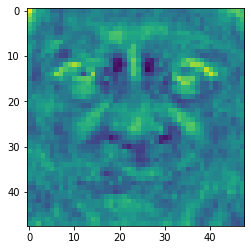

In [ ]:
a= method2(xtr,tr_ages)

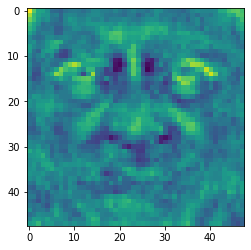

In [ ]:
plotw(method3(xtr,tr_ages,.1))

In [ ]:
m1 = method1(xtr,tr_ages)
print("(Half) Mean Squared Error of method1 on training data = %f" % fMSE(m1,xtr,tr_ages))
print("(Half) Mean Squared Error of method1 on testing data = %f" % fMSE(m1,xte,te_ages))

(Half) Mean Squared Error of method1 on training data = 39.242963
(Half) Mean Squared Error of method1 on testing data = 206.796475


In [ ]:
m2 = method2(xtr,tr_ages)
print("(Half) Mean Squared Error of method2 on training data = %f" % fMSE(m2,xtr,tr_ages))
print("(Half) Mean Squared Error of method2 on testing data = %f" % fMSE(m2,xte,te_ages))

(Half) Mean Squared Error of method2 on training data = 83.555538
(Half) Mean Squared Error of method2 on testing data = 93.082510


In [ ]:
m3 = method3(xtr,tr_ages,.1)
print("(Half) Mean Squared Error of method2 on training data = %f" % fMSE(m3,xtr,tr_ages))
print("(Half) Mean Squared Error of method2 on testing data = %f" % fMSE(m3,xte,te_ages))

(Half) Mean Squared Error of method2 on training data = 83.547153
(Half) Mean Squared Error of method2 on testing data = 93.087716


In [79]:
print(fMSE(m3,xte,te_ages)**(1/2))
yhat = xte.dot(m3)
diff = yhat - te_ages
squared_diff = diff*diff
highest_diff_indeces = np.argpartition(squared_diff, -5)[-5:]
fin_list = highest_diff_indeces[np.argsort(squared_diff[highest_diff_indeces],)]

9.64819755332411


5th highest difference = 45.63399917656808. Real age = 8.0, predicted age = 53.63399917656808


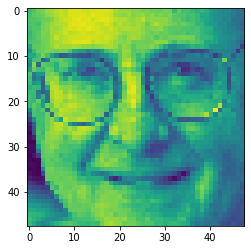

In [80]:
print(f"5th highest difference = {squared_diff[fin_list[0]]**(1/2)}. Real age = {te_ages[fin_list[0]]}, predicted age = {yhat[fin_list[0]]}")
plt.imshow(te_faces[fin_list[0]])

4th highest difference = 46.72628601438948. Real age = 80.0, predicted age = 33.27371398561052


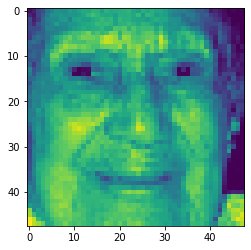

In [81]:
print(f"4th highest difference = {squared_diff[fin_list[1]]**(1/2)}. Real age = {te_ages[fin_list[1]]}, predicted age = {yhat[fin_list[1]]}")
plt.imshow(te_faces[fin_list[1]])

3rd highest difference = 47.37049950162363. Real age = 89.0, predicted age = 41.62950049837637


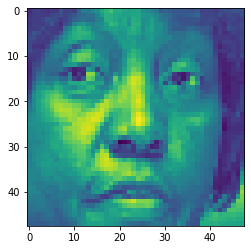

In [82]:
print(f"3rd highest difference = {squared_diff[fin_list[2]]**(1/2)}. Real age = {te_ages[fin_list[2]]}, predicted age = {yhat[fin_list[2]]}")
plt.imshow(te_faces[fin_list[2]])

2nd highest difference = 48.41329151174243. Real age = 4.0, predicted age = 52.41329151174243


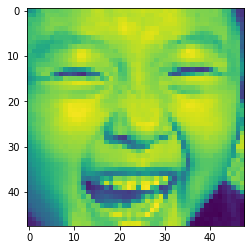

In [83]:
print(f"2nd highest difference = {squared_diff[fin_list[3]]**(1/2)}. Real age = {te_ages[fin_list[3]]}, predicted age = {yhat[fin_list[3]]}")
plt.imshow(te_faces[fin_list[3]])

1st highest difference = 50.00438084678065. Real age = 10.0, predicted age = 60.00438084678065


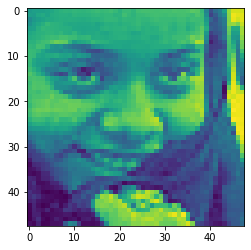

In [84]:
print(f"1st highest difference = {squared_diff[fin_list[4]]**(1/2)}. Real age = {te_ages[fin_list[4]]}, predicted age = {yhat[fin_list[4]]}")
plt.imshow(te_faces[fin_list[4]])